In [1]:
%matplotlib ipympl

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def read_walkers_csv(file):
    data = {}
    df = pd.read_csv(file)
    data['xi'] = df.PositionXi.values
    data['yi'] = df.PositionYi.values
    data['zi'] = df.PositionZi.values
    data['xf'] = df.PositionXf.values
    data['yf'] = df.PositionYf.values
    data['zf'] = df.PositionZf.values
    data['xirate'] = df.XIRate.values
    data['count'] = data['xi'].size
    return data

In [3]:
imgdir = r'/home/matheus/Documentos/doutorado_ic/tese/NMR/Images/Synthetic/sphere/3spheres_r=2.5voxels_r=5.0voxels_r=10.0voxels'
imgfiles = [os.path.join(imgdir,f) for f in sorted(os.listdir(imgdir))]
img = plt.imread(imgfiles[0])
image_data = np.zeros([len(imgfiles), img.shape[0], img.shape[1]])
for i,im in enumerate(imgfiles):
    img = plt.imread(im)
    image_data[i] = rgb2gray(img)

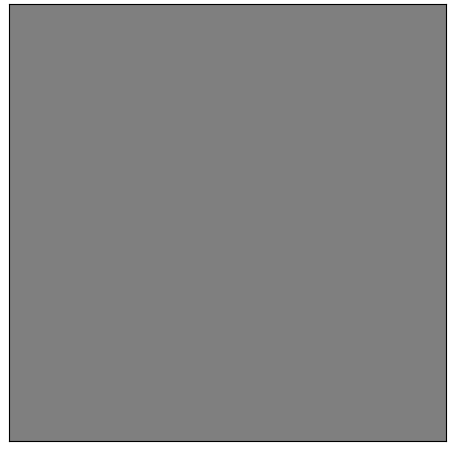

In [4]:
# If fig was created, replace it 
try:
   plt.close(fig)
except:
    pass

fig, axs = plt.subplots(1,1, figsize=(4.5,4.5), constrained_layout=True)
axs.set_xticks([])
axs.set_yticks([])
axs.imshow(image_data[0], cmap='gray', vmin=0, vmax=1)

def update_slider(change):
    axs.imshow(image_data[change.new], cmap='gray', vmin=0, vmax=1)
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=0,
    min=0, max=image_data.shape[0]-1, step=1,
    description='slice',
    continuous_update=False
)
int_slider.observe(update_slider, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [ ]:
plt.close('all')

In [7]:
walkers_nofilter = r'data/walkers_sph_mapfilter=0_shift=1_it=1.csv'
walkers_filtered = r'data/walkers_sph_mapfilter=3_shift=1_it=1.csv'
shifts = 1

data = {
    'nofilter': read_walkers_csv(walkers_nofilter),
    'filtered': read_walkers_csv(walkers_filtered)
}

In [8]:
vd = np.power(2,shifts)
occurs = np.zeros(image_data.shape)
occurs_filtered = np.zeros(image_data.shape)
foccurs = np.zeros(image_data.shape)
foccurs_filtered = np.zeros(image_data.shape)

for i in range(data['nofilter']['count']):
    coordX = data['nofilter']['xi'][i] // vd
    coordY = data['nofilter']['yi'][i] // vd
    coordZ = data['nofilter']['zi'][i] // vd
    occurs[coordZ,coordY,coordX] += 1
    
    coordX = data['nofilter']['xf'][i] // vd
    coordY = data['nofilter']['yf'][i] // vd
    coordZ = data['nofilter']['zf'][i] // vd
    foccurs[coordZ,coordY,coordX] += 1

for i in range(data['filtered']['count']):
    coordX = data['filtered']['xi'][i] // vd
    coordY = data['filtered']['yi'][i] // vd
    coordZ = data['filtered']['zi'][i] // vd
    occurs_filtered[coordZ,coordY,coordX] += 1
    
    coordX = data['filtered']['xf'][i] // vd
    coordY = data['filtered']['yf'][i] // vd
    coordZ = data['filtered']['zf'][i] // vd
    foccurs_filtered[coordZ,coordY,coordX] += 1

# normalize data
occurs = occurs / occurs.max()
occurs_filtered = occurs_filtered / occurs_filtered.max()
foccurs = foccurs / foccurs.max()
foccurs_filtered = foccurs_filtered / foccurs_filtered.max()


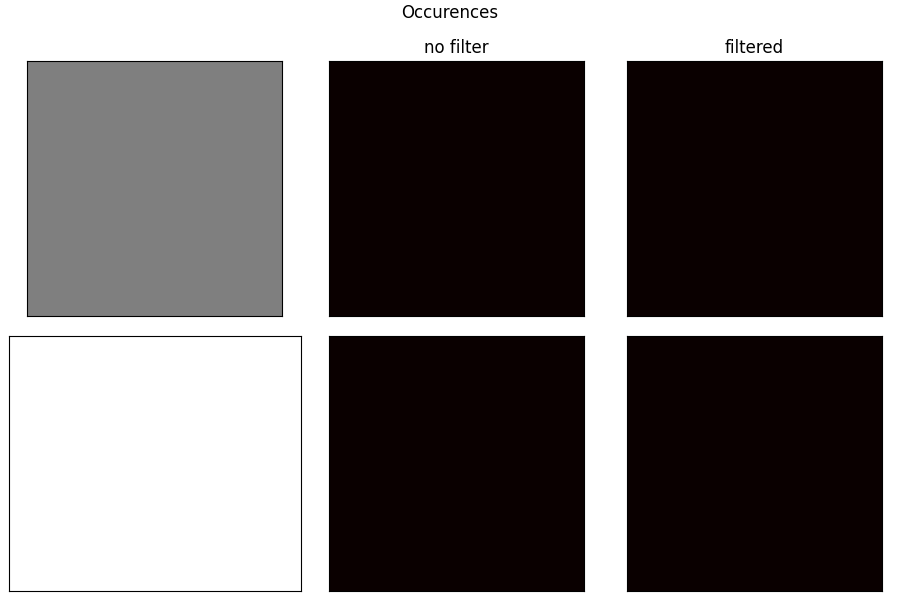

In [26]:
# If fig was created, replace it 
try:
   plt.close(fig)
except:
    pass

fig, axs = plt.subplots(2,3, figsize=(9.0,6.0), constrained_layout=True)
fig.suptitle('Occurences')
axs[0][1].set_title('no filter')
axs[0][2].set_title('filtered')
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
axs[0][0].imshow(image_data[0], cmap='gray', vmin=0, vmax=1)
axs[0][1].imshow(occurs[0], cmap='hot', vmin=0, vmax=1)
axs[0][2].imshow(occurs_filtered[0], cmap='hot', vmin=0, vmax=1)
axs[1][1].imshow(foccurs[0], cmap='hot', vmin=0, vmax=1)
axs[1][2].imshow(foccurs_filtered[0], cmap='hot', vmin=0, vmax=1)

def update_slider(change):
    axs[0][0].imshow(image_data[change.new], cmap='gray', vmin=0, vmax=1)
    axs[0][1].imshow(occurs[change.new], cmap='hot', vmin=0, vmax=1)
    axs[0][2].imshow(occurs_filtered[change.new], cmap='hot', vmin=0, vmax=1)
    axs[1][1].imshow(foccurs[change.new], cmap='hot', vmin=0, vmax=1)
    axs[1][2].imshow(foccurs_filtered[change.new], cmap='hot', vmin=0, vmax=1)
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=0,
    min=0, max=image_data.shape[0]-1, step=1,
    description='slice',
    continuous_update=False
)
int_slider.observe(update_slider, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [10]:
plt.close('all')

In [22]:
vd = np.power(2,shifts)
occurs = np.zeros(image_data.shape)
xirate = np.zeros(image_data.shape)
occurs_filtered = np.zeros(image_data.shape)
xirate_filtered = np.zeros(image_data.shape)

for i in range(data['nofilter']['count']):
    coordX = data['nofilter']['xi'][i] // vd
    coordY = data['nofilter']['yi'][i] // vd
    coordZ = data['nofilter']['zi'][i] // vd
    occurs[coordZ,coordY,coordX] += 1
    xirate[coordZ,coordY,coordX] += data['nofilter']['xirate'][i]

for i in range(data['filtered']['count']):
    coordX = data['filtered']['xi'][i] // vd
    coordY = data['filtered']['yi'][i] // vd
    coordZ = data['filtered']['zi'][i] // vd
    occurs_filtered[coordZ,coordY,coordX] += 1
    xirate_filtered[coordZ,coordY,coordX] += data['filtered']['xirate'][i]

# normalize data
for z in range(image_data.shape[0]):
    for y in range(image_data.shape[1]):
        for x in range(image_data.shape[2]):
            if(occurs[z,y,x] > 0):
                xirate[z,y,x] = xirate[z,y,x]/occurs[z,y,x]
            if(occurs_filtered[z,y,x] > 0):                
                xirate_filtered[z,y,x] = xirate_filtered[z,y,x]/occurs[z,y,x]
                
xirate /= xirate.max()
xirate_filtered /= xirate_filtered.max()

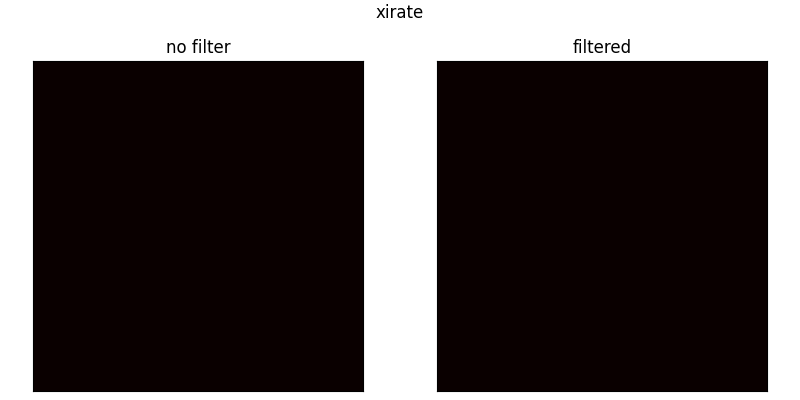

In [27]:
# If fig was created, replace it 
try:
   plt.close(fig)
except:
    pass

mcmap = 'hot'
fig, axs = plt.subplots(1,2, figsize=(8.0,4.0), constrained_layout=True)
fig.suptitle('xirate')
axs[0].set_title('no filter')
axs[1].set_title('filtered')
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    
axs[0].imshow(xirate[0], cmap=mcmap, vmin=0, vmax=1)
axs[1].imshow(xirate_filtered[0], cmap=mcmap, vmin=0, vmax=1)

def update_slider(change):
    axs[0].imshow(xirate[change.new], cmap=mcmap, vmin=0, vmax=1)
    axs[1].imshow(xirate_filtered[change.new], cmap=mcmap, vmin=0, vmax=1)
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=0,
    min=0, max=image_data.shape[0]-1, step=1,
    description='slice',
    continuous_update=False
)
int_slider.observe(update_slider, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [20]:
plt.close('all')

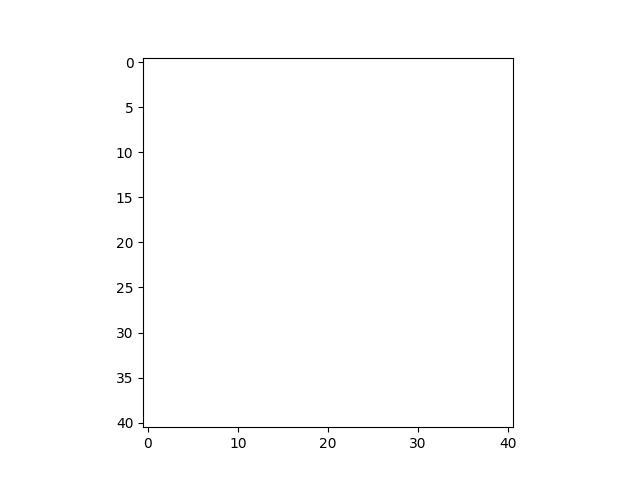

In [21]:
plt.imshow(xirate[20])